## 이미지 분류

### 숫자데이터 분류 모델

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
import numpy as np

# 이미지를 숫자로 표현
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

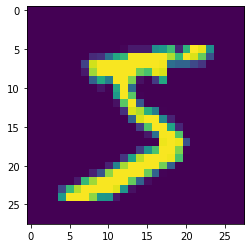

In [6]:
plt.imshow(X_train[0]) # 이미지 확인

In [7]:
y_train[0] # 라벨 확인

5

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([Flatten(input_shape= (28, 28)), Dense(256, activation='relu'), Dense(10, activation='softmax')])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4510 - accuracy: 0.8873
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3293 - accuracy: 0.9283
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2697 - accuracy: 0.9382
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2513 - accuracy: 0.9427
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2296 - accuracy: 0.9459


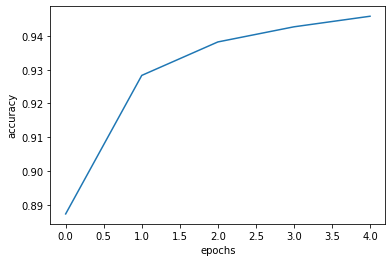

In [20]:
plt.plot(history.history["accuracy"], label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show();

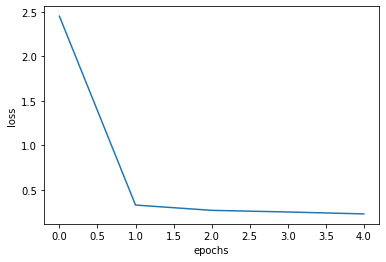

In [22]:
plt.plot(history.history["loss"], label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();

## Fashoin mnist

In [23]:
import tensorflow as tf
import numpy as np 

In [26]:
mnist = tf.keras.datasets.fashion_mnist

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0 # 정규화 (0-1)

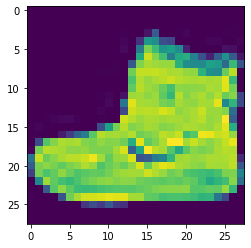

In [29]:
plt.imshow(X_train[0])

In [30]:
y_train[0] # 9가 뭔지 모름

9

In [34]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(classes[y_train[0]])

Ankle boot


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential([Flatten(input_shape= (28, 28)), 
                    Dense(256, activation='relu'), 
                    Dropout(0.2),
                    Dense(10, activation='softmax')
                   ])

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9768 - accuracy: 0.6610 - val_loss: 0.7467 - val_accuracy: 0.7294
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7892 - accuracy: 0.7146 - val_loss: 0.6347 - val_accuracy: 0.7602
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7126 - accuracy: 0.7449 - val_loss: 0.6253 - val_accuracy: 0.7979
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7086 - accuracy: 0.7523 - val_loss: 0.5586 - val_accuracy: 0.8085
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6920 - accuracy: 0.7579 - val_loss: 0.6154 - val_accuracy: 0.7845
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6907 - accuracy: 0.7595 - val_loss: 0.6052 - val_accuracy: 0.8049
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6794 - accuracy: 0.7628 - val_loss: 0.5533 - val_accuracy:

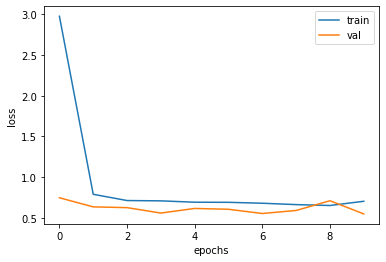

In [41]:
plt.plot(history.history["loss"], label='train')
plt.plot(history.history["val_loss"], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show();

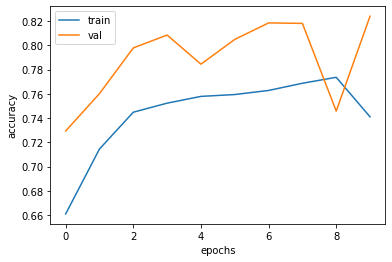

In [42]:
plt.plot(history.history["accuracy"], label='train')
plt.plot(history.history["val_accuracy"], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show();

In [43]:
pred = model.predict(X_test)
pred[1]

array([2.0560878e-04, 8.3587787e-05, 8.9577293e-01, 3.0399046e-09, 2.9558718e-02, 9.9667902e-18, 7.4378952e-02,
       0.0000000e+00, 1.4948596e-07, 0.0000000e+00], dtype=float32)

In [44]:
np.argmax(pred[1])

2

In [45]:
classes[np.argmax(pred[1])] #  예측 라벨

'Pullover'

In [46]:
classes[y_test[1]]  # 실제라벨

'Pullover'

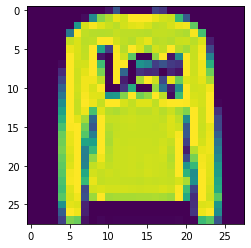

In [47]:
plt.imshow(X_test[1])

## CNN을 활용한 이미지 분류

In [54]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [49]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [51]:
# conv 넣기 위해선 shape 변경해줘야됨
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [52]:
# 정규화
X_train, X_test = X_train/255.0, X_test/255.0

In [55]:
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 129s 68ms/step - loss: 0.2161 - accuracy: 0.9329 - val_loss: 0.0782 - val_accuracy: 0.9761
Epoch 2/5
1875/1875 [==============================] - 138s 73ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.0533 - val_accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0559 - accuracy: 0.9822 - val_loss: 0.0632 - val_accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0478 - val_accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0464 - val_accuracy: 0.9867


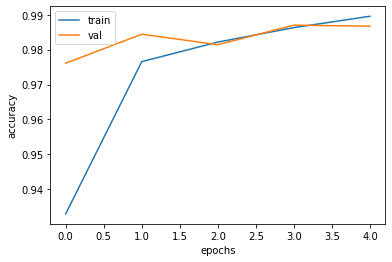

In [58]:
plt.plot(history.history["accuracy"], label='train')
plt.plot(history.history["val_accuracy"], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show();

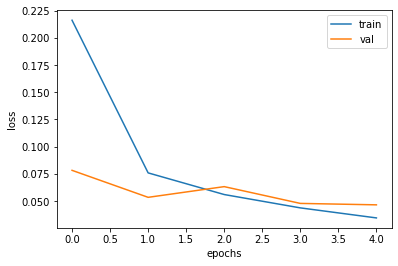

In [59]:
plt.plot(history.history["loss"], label='train')
plt.plot(history.history["val_loss"], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show();